# Code to Produce some Additional Visualization

## Imports

In [2]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

/var/folders/k1/ypk5p6h57154zss_y_50gngw0000gn/T/ipykernel_31517/3522642821.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Duplicate key in file '/Users/arjunrajpal/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


In [3]:
import ast

df = pd.read_csv('./data/emotions_data.csv')
df['emotions'] = df['emotions'].apply(ast.literal_eval)
df['emotion_scores'] = df['emotion_scores'].apply(ast.literal_eval)
df['emotion_label'] = df.apply(lambda row: row['emotions'][np.argmax(row['emotion_scores'])], axis=1)

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


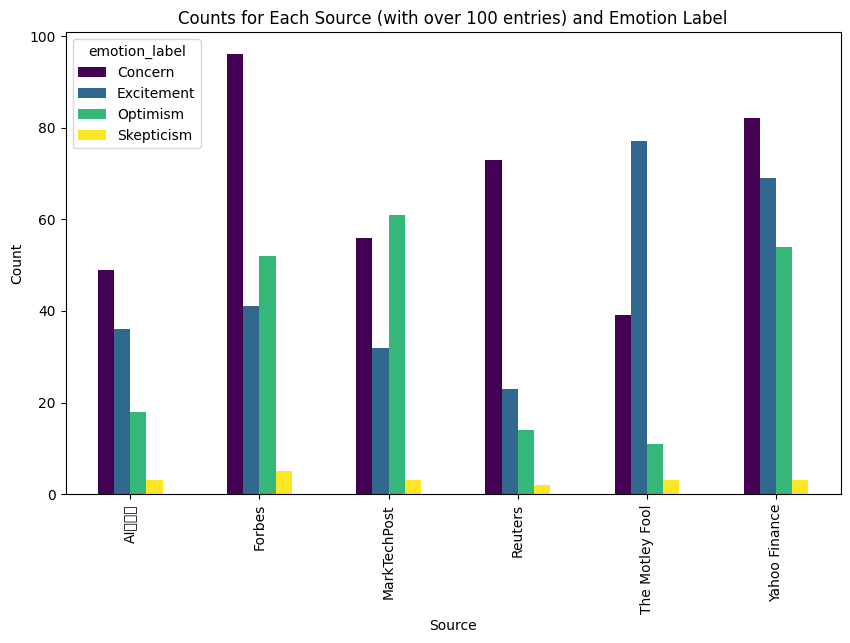

In [4]:
grouped_values = df.groupby(['source', 'emotion_label']).size()
mask = grouped_values.groupby(level=0).transform('sum') > 100
filtered_values = grouped_values[mask]
filtered_values.unstack().plot(kind='bar', stacked=False, colormap='viridis',figsize=(10, 6))
plt.title('Counts for Each Source (with over 100 entries) and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

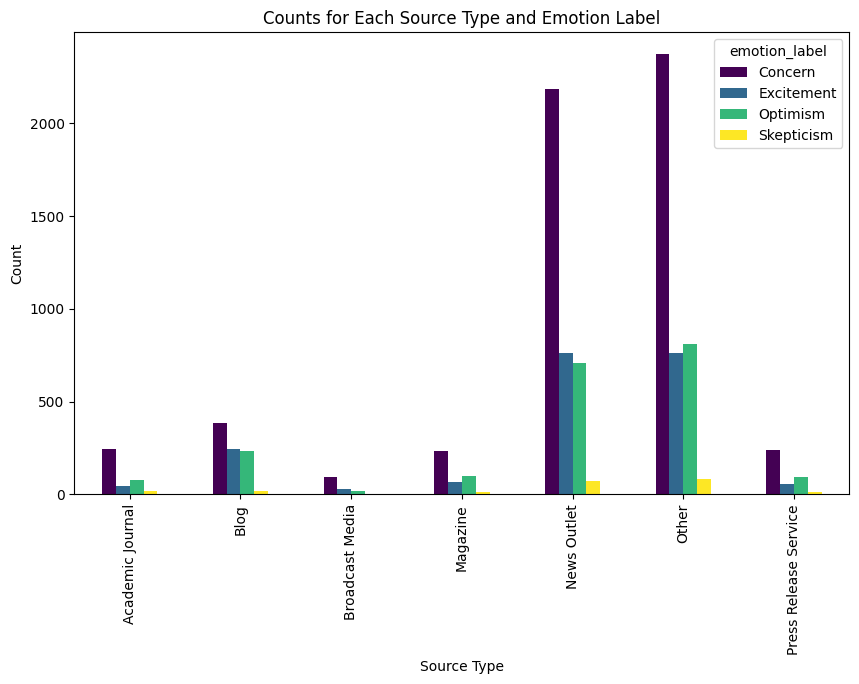

In [5]:
grouped_values = df.groupby(['source_type', 'emotion_label']).size()
mask = grouped_values.groupby(level=0).transform('sum') > 100
filtered_values = grouped_values[mask]
filtered_values.unstack().plot(kind='bar', stacked=False, colormap='viridis',figsize=(10, 6))
plt.title('Counts for Each Source Type and Emotion Label')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.show()

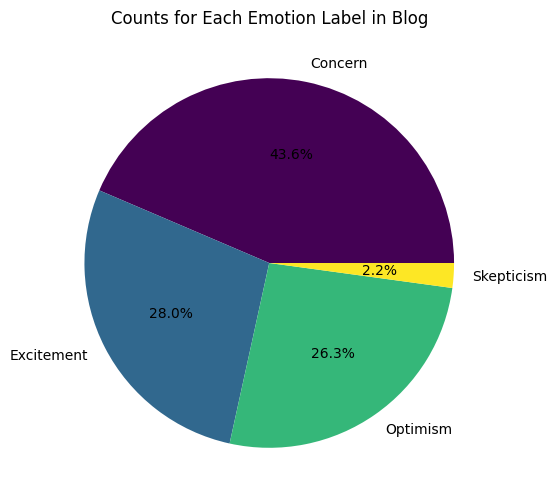

In [6]:
# Filter 'filtered_values' to only include rows where the 'source_type' is 'Blog'
blog_values = filtered_values.loc['Blog']

# Create a pie chart of the 'Blog' values
blog_values.plot(kind='pie', colormap='viridis', figsize=(10, 6), autopct='%1.1f%%')
plt.title('Counts for Each Emotion Label in Blog')
plt.ylabel('')
plt.show()

month
November     2991
October      2917
August        979
September     935
June          878
July          750
May           550
Name: count, dtype: int64
month      emotion_label
August     Concern           562
           Excitement        184
           Optimism          206
           Skepticism         27
July       Concern           452
           Excitement        134
           Optimism          142
           Skepticism         22
June       Concern           527
           Excitement        173
           Optimism          158
           Skepticism         20
May        Concern           318
           Excitement        103
           Optimism          113
           Skepticism         16
November   Concern          1651
           Excitement        648
           Optimism          630
           Skepticism         62
October    Concern          1756
           Excitement        527
           Optimism          575
           Skepticism         59
September  Concern       

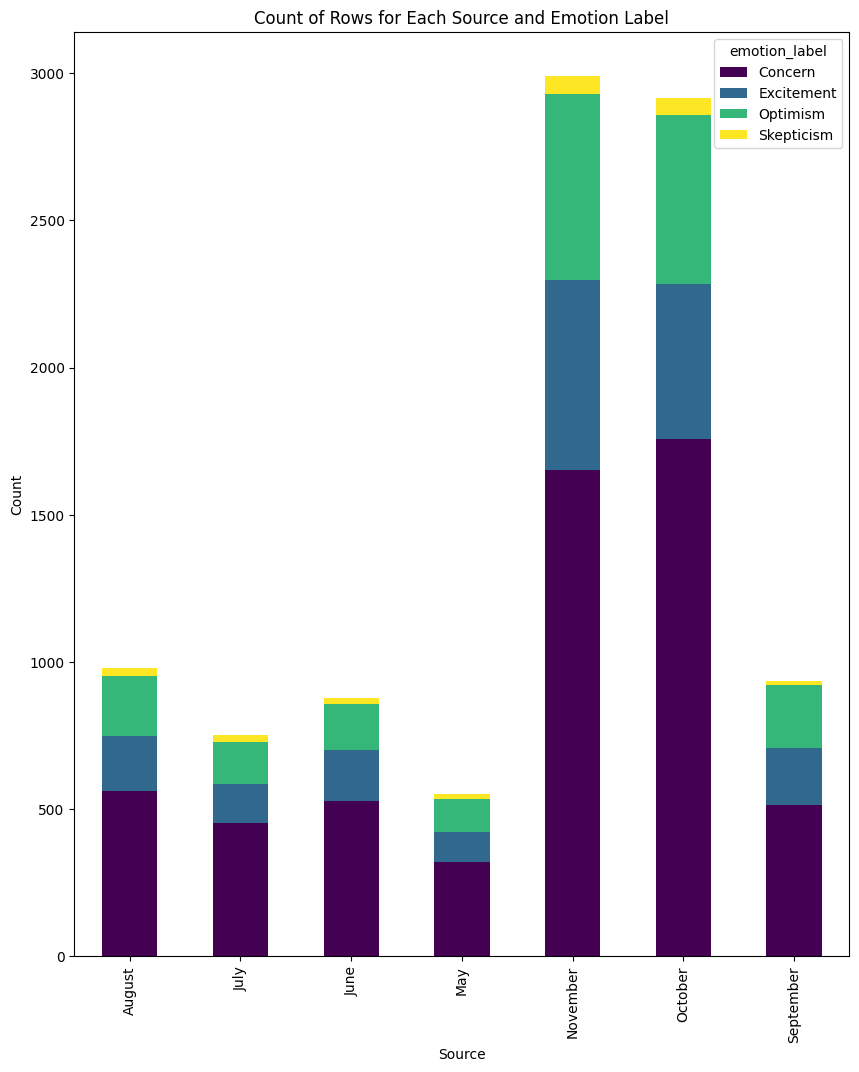

In [7]:
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
grouped_values = df.groupby(['month', 'emotion_label']).size()
print(df['month'].value_counts())
print(grouped_values)

grouped_values.unstack().plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 12))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
9995    2023
9996    2023
9997    2023
9998    2023
9999    2023
Name: year, Length: 10000, dtype: int64
month
November     2991
October      2917
August        979
September     935
June          878
July          750
May           550
Name: count, dtype: int64
month      emotion_label
August     Concern           562
           Excitement        184
           Optimism          206
           Skepticism         27
July       Concern           452
           Excitement        134
           Optimism          142
           Skepticism         22
June       Concern           527
           Excitement        173
           Optimism          158
           Skepticism         20
May        Concern           318
           Excitement        103
           Optimism          113
           Skepticism         16
November   Concern          1651
           Excitement        648
           Optimism          630
       

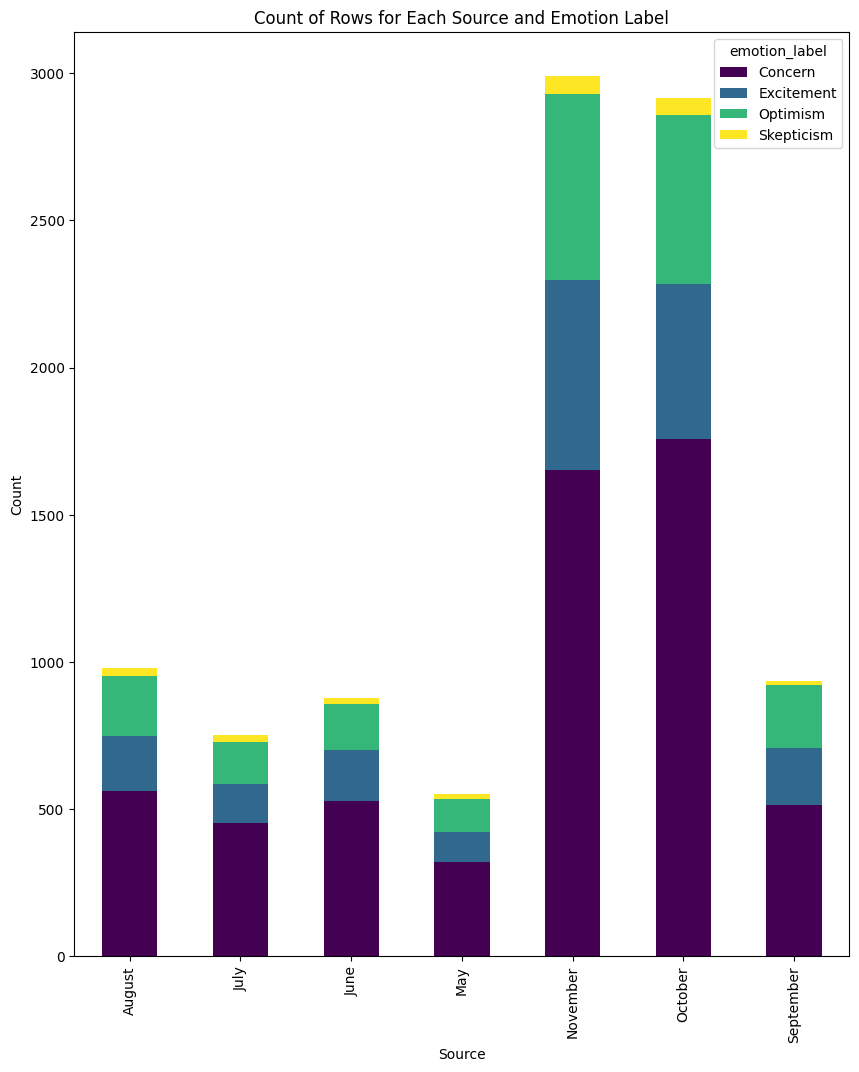

In [8]:
# Map 'month' to string name for month
print(df['year'])
grouped_values = df.groupby(['month', 'emotion_label']).size()
print(df['month'].value_counts())
print(grouped_values)

grouped_values.unstack().plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 12))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

year
2023    10000
Name: count, dtype: int64
year  emotion_label
2023  Concern          5780
      Excitement       1963
      Optimism         2038
      Skepticism        219
dtype: int64


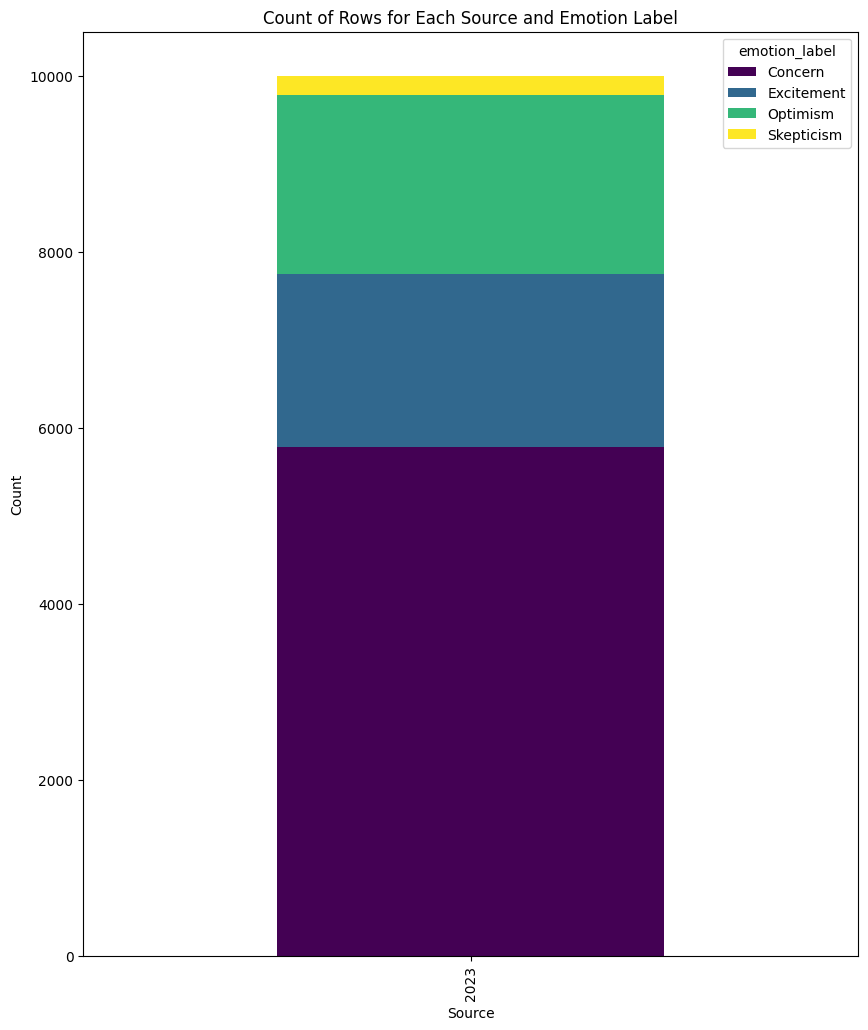

In [9]:
grouped_values = df.groupby(['year', 'emotion_label']).size()
print(df['year'].value_counts())
print(grouped_values)

grouped_values.unstack().plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 12))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

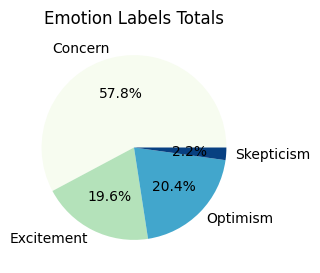

Skipping Concern because it has only one emotion label associated with it.
Skipping Excitement because it has only one emotion label associated with it.
Skipping Optimism because it has only one emotion label associated with it.
Skipping Skepticism because it has only one emotion label associated with it.


In [10]:
import pandas as pd

grouped_values = df.groupby(['emotion_label']).size()
# Get the unique source types
source_types = grouped_values.index.get_level_values(0).unique()
grouped_values.plot(kind='pie', colormap='GnBu', figsize=(3, 3), autopct='%1.1f%%')
plt.title(f'Emotion Labels Totals')
plt.ylabel('')
plt.show()

# Loop over the source types
for source_type in source_types:
    # Filter 'grouped_values' to only include rows where the 'source' is the current source type
    source_values = grouped_values.loc[source_type]

    # Check if 'source_values' is a Series
    if isinstance(source_values, pd.Series):
        # Create a pie chart of the source values
        source_values.plot(kind='pie', colormap='GnBu', figsize=(3, 3), autopct='%1.1f%%')
        plt.title(f'Emotion Label Totals for {source_type}')
        plt.ylabel('')
        plt.show()
    else:
        print(f"Skipping {source_type} because it has only one emotion label associated with it.")

In [11]:
# Randomly sample 4 titles from each emotion label category
sampled_titles = df[df['language']=='en'].groupby('emotion_label').apply(lambda x: x.sample(n=4))

# Save the results to a CSV file
sampled_titles[['title', 'emotion_label']].to_csv('sampled_titles.csv')

/var/folders/k1/ypk5p6h57154zss_y_50gngw0000gn/T/ipykernel_31517/1353056157.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_titles = df[df['language']=='en'].groupby('emotion_label').apply(lambda x: x.sample(n=4))


In [74]:
import ast

# # Convert the strings in the 'dominant_topic' column to tuples
# df['dominant_topic'] = df['dominant_topic'].apply(ast.literal_eval)

df['dominant_topic_first_value'] = df.query("language == 'en'")['dominant_topic'].apply(lambda x: x[0])

# Group by the first values and get the 'title' column for each group
grouped_values = df.groupby('dominant_topic_first_value')['title'].apply(list).apply(lambda x: x[:5])
display(grouped_values)
# Display the result
grouped_values.to_csv('titles_by_topic.csv')

dominant_topic_first_value
0.0    [The Creator Film Review: Sympathy for AI - Th...
1.0    [Time travel and genius AI: Research roundup -...
2.0    [Nick Bostrom: Will AI lead to tyranny? - UnHe...
3.0    [This techie applies to 5,000 jobs using AI, m...
4.0    [Know how AI is being leveraged to launch soph...
Name: title, dtype: object